# Drift correction through phase cross correlation 
Given 2 images computes shift in pixels in x and y. 
#### Contributor(s): Utkarsh Pratiush <utkarshp1161@gmail.com> - 26th March 2025
#### edited - 
   

In [1]:
from stemOrchestrator.process import compute_drift, plot_drift_comparison, tiff_to_numpy


In [2]:
data_folder = "../../data"

37.14 -0.43


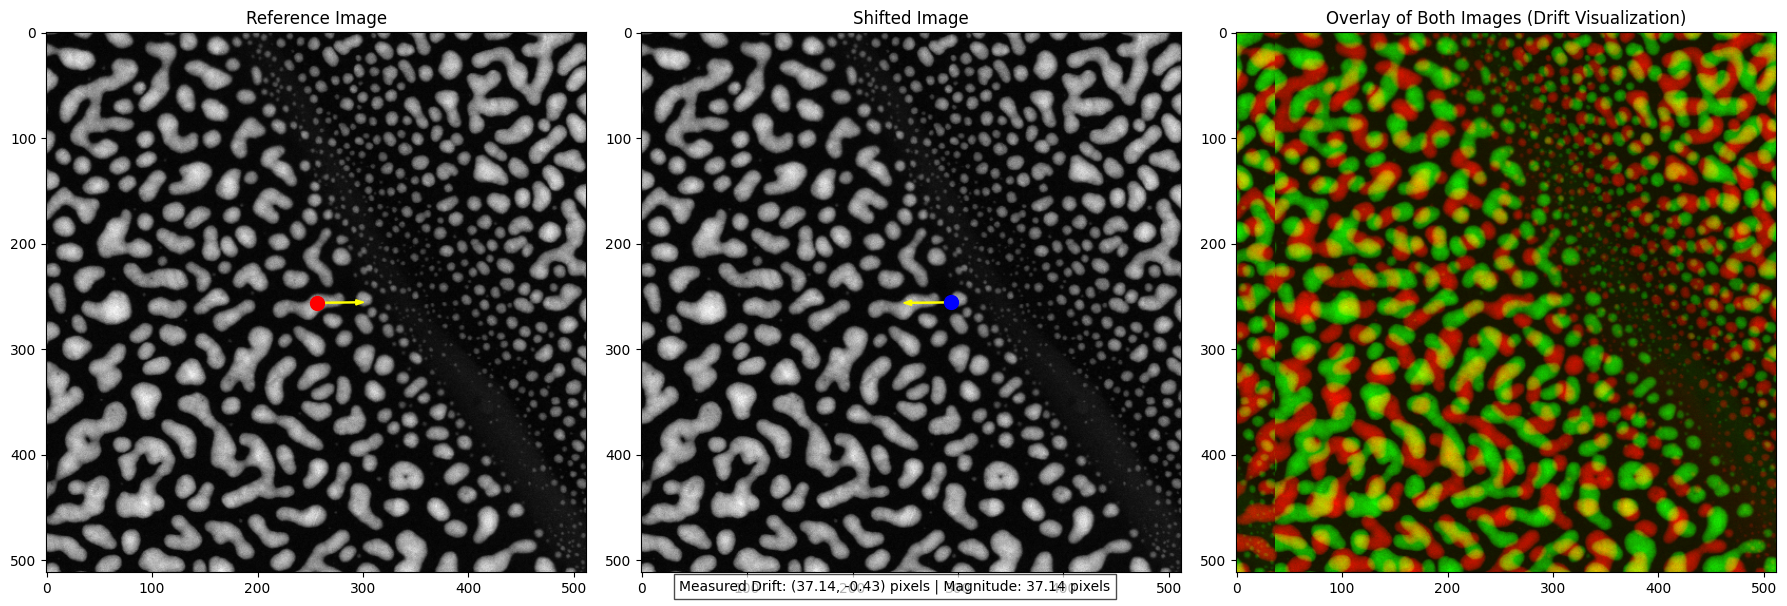

In [3]:
haadf_np_array_old, haadf_np_array_shifted = tiff_to_numpy(f"{data_folder}/drift_frame1.tiff"), tiff_to_numpy(f"{data_folder}/drift_frame2.tiff")
image1, image2 = haadf_np_array_old, haadf_np_array_shifted
shift_x, shift_y = compute_drift(image1.T, image2.T)
print(shift_x, shift_y)
fig = plot_drift_comparison(image1, image1, shift_x, shift_y)
